EXPERIMENT # 1 : IMPLEMENTATION OF BASIC PYTHON PROGRAMS
2. bfs
3. dfs
4. idfs
5. simple plots like bar , scatter, histogram, box plot etc
6. randon movement
7. a* algorithm.

EXPERIMENT # 2: IMPLEMENT A RANDOM MOVEMENT REFLEX AGENT

EXPERIMENT # 3 : FIND THE PATH TO REACH THE TARGET FROM A SOURCE NODE IN GIVEN  GRAPH

EXPERIMENT # 4: SOLVE 15 PUZZLE PROBLEMS USING A PRIORITY QUEUE


In [ ]:
import random

def create_environment(size):
    return {
        'size': size,
        'agent_position': [0, 0]
    }

def is_valid_move(environment, position):
    size = environment['size']
    return 0 <= position[0] < size and 0 <= position[1] < size

def perceive(environment):
    return environment['agent_position']

def act(environment):
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right
    random_move = random.choice(moves)
    new_position = [
        environment['agent_position'][0] + random_move[0],
        environment['agent_position'][1] + random_move[1]
    ]

    if is_valid_move(environment, new_position):
        environment['agent_position'] = new_position
        return f"Moved to {environment['agent_position']}"
    else:
        return "Cannot move, stayed in place"

def main():
    env_size = 5
    num_steps = 10

    environment = create_environment(env_size)

    print(f"Starting position: {perceive(environment)}")

    for step in range(num_steps):
        print(f"Step {step + 1}: {act(environment)}")

if __name__ == "__main__":
    main()

Starting position: [0, 0]
Step 1: Moved to [1, 0]
Step 2: Cannot move, stayed in place
Step 3: Moved to [2, 0]
Step 4: Moved to [2, 1]
Step 5: Moved to [2, 0]
Step 6: Moved to [1, 0]
Step 7: Cannot move, stayed in place
Step 8: Moved to [2, 0]
Step 9: Moved to [3, 0]
Step 10: Moved to [3, 1]


Path: A -> C -> G -> K -> L


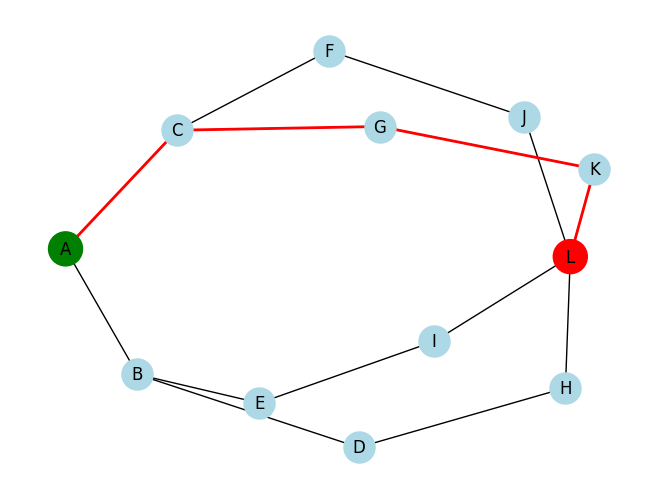

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from queue import PriorityQueue

def best_first_search(G, start, goal):
    frontier = PriorityQueue()
    frontier.put((0, start, [start]))
    while not frontier.empty():
        _, node, path = frontier.get()
        if node == goal:
            return path
        for neighbor in G[node]:
            if neighbor not in path:
                new_path = path + [neighbor]
                priority = abs(ord(neighbor) - ord(goal))
                frontier.put((priority, neighbor, new_path))
    return None

G = nx.Graph([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'),
              ('C', 'G'), ('D', 'H'), ('E', 'I'), ('F', 'J'), ('G', 'K'),
              ('H', 'L'), ('I', 'L'), ('J', 'L'), ('K', 'L')])

path = best_first_search(G, 'A', 'L')
print("Path:", ' -> '.join(path) if path else "No path found")

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
if path:
    nx.draw_networkx_edges(G, pos, edgelist=list(zip(path, path[1:])), edge_color='r', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=[path[0], path[-1]], node_color=['g', 'r'], node_size=600)
plt.show()

In [ ]:
import networkx as nx

def bidirectional_search(G, start, goal):
    forward = {start: None}
    backward = {goal: None}

    while forward and backward:
        if set(forward.keys()) & set(backward.keys()):
            return True

        forward = {v: u for u in forward for v in G[u] if v not in forward}
        backward = {v: u for u in backward for v in G[u] if v not in backward}

    return False

# Example usage
'''G = nx.Graph()
G.add_edges_from([(1,2), (2,3), (3,4), (4,5)])
print(bidirectional_search(G, 1, 5))'''

G = nx.Graph()
G.add_edges_from([
    (1, 2), (2, 3), (3, 4), (4, 5),
    (1, 6), (6, 7), (7, 8), (8, 9),
    (5, 9), (3, 7)
])
print(bidirectional_search(G, 1, 9))

True


Path found: [1, 2, 3, 7, 8, 9]


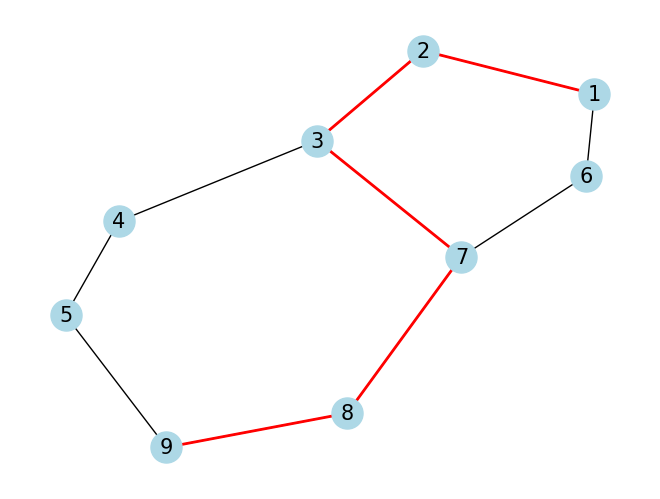

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

def a_star_search(G, start, goal):
    # Heuristic function for A* search
    def heuristic(node):
        return abs(node-goal)

    # Priority queue for nodes to explore
    frontier = [(0, start)]  # (cost + heuristic, node)
    came_from = {start: None}
    cost_so_far = {start: 0}

    while frontier:
        current_cost, current_node = heapq.heappop(frontier)

        if current_node == goal:
            return reconstruct_path(came_from, start, goal)

        for neighbor in G.neighbors(current_node):
            new_cost = cost_so_far[current_node] + G[current_node][neighbor].get('weight', 1)
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor)
                heapq.heappush(frontier, (priority, neighbor))
                came_from[neighbor] = current_node

    return None

def reconstruct_path(came_from, start, goal):
    path = []
    node = goal
    while node:
        path.append(node)
        node = came_from[node]
    return path[::-1]

def display_graph_and_path(G, path):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=15)
    if path:
        nx.draw_networkx_edges(G, pos, edgelist=list(zip(path, path[1:])), edge_color='r', width=2)
    plt.show()

# Example usage
G = nx.Graph()
G.add_weighted_edges_from([
    (1, 2, 1), (2, 3, 2), (3, 4, 1), (4, 5, 3),
    (1, 6, 5), (6, 7, 2), (7, 8, 1), (8, 9, 1),
    (5, 9, 1), (3, 7, 1)
])

start_node, goal_node = 1, 9
path = a_star_search(G, start_node, goal_node)
print("Path found:", path)
display_graph_and_path(G, path)

Shortest path from A to J: A -> F -> G -> I -> J
Total cost: 10


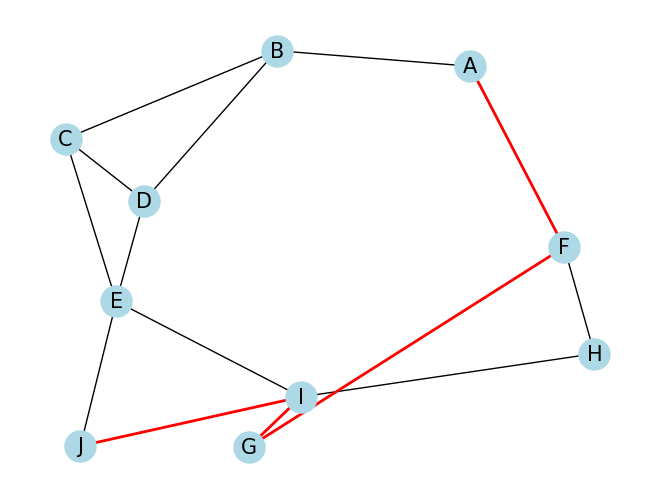

In [ ]:
import networkx as nx
import heapq
import matplotlib.pyplot as plt

def create_graph():
    G = nx.Graph()
    edges = [
        ('A', 'B', 6), ('A', 'F', 3),
        ('B', 'C', 3), ('B', 'D', 2),
        ('C', 'D', 1), ('C', 'E', 5),
        ('D', 'E', 8),
        ('E', 'I', 5), ('E', 'J', 5),
        ('F', 'G', 1), ('F', 'H', 7),
        ('G', 'I', 3),
        ('H', 'I', 2),
        ('I', 'J', 3)
    ]
    G.add_weighted_edges_from(edges)

    # Add heuristic values
    heuristics = {
        'A': 10, 'B': 8, 'C': 5, 'D': 7,
        'E': 3, 'F': 6, 'G': 5, 'H': 3,
        'I': 1, 'J': 0
    }
    nx.set_node_attributes(G, heuristics, 'heuristic')

    return G

def heuristic(node, goal, G):
    return G.nodes[node]['heuristic']

def astar(graph, start, goal):
    frontier = [(0, start)]
    came_from = {}
    cost_so_far = {start: 0}

    while frontier:
        current_cost, current_node = heapq.heappop(frontier)

        if current_node == goal:
            break

        for next_node in graph.neighbors(current_node):
            new_cost = cost_so_far[current_node] + graph[current_node][next_node]['weight']
            if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                cost_so_far[next_node] = new_cost
                priority = new_cost + heuristic(next_node, goal, graph)
                heapq.heappush(frontier, (priority, next_node))
                came_from[next_node] = current_node

    # Reconstruct path
    path = []
    current = goal
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()

    return path, cost_so_far[goal]

def display_graph_and_path(G, path):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=15)
    if path:
        nx.draw_networkx_edges(G, pos, edgelist=list(zip(path, path[1:])), edge_color='r', width=2)
    plt.show()

# Create the graph
G = create_graph()

# Run A* algorithm
start_node = 'A'
goal_node = 'J'
path, cost = astar(G, start_node, goal_node)

print(f"Shortest path from {start_node} to {goal_node}: {' -> '.join(path)}")
print(f"Total cost: {cost}")
display_graph_and_path(G, path)